In [1]:
%matplotlib inline
import os
import json
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_rating(fname, rater=None):
    ds, sub = os.path.basename(os.path.splitext(fname)[0]).split('_')
    data = {'dataset': ds, 'subject': sub}
    if rater is not None:
        data['rater'] = rater
    
    with open(fname) as f:
        ratings = json.load(f)
    
    for reportlet in ratings['reports']:
        name = reportlet['name']
        
        if name == 'overall':
            data[name] = int(reportlet['rating'])
        elif '_T1w_' in name:
            data['t1_%s' % name.split('_T1w_')[-1]] = int(reportlet['rating'])
        elif '_bold_' in name:
            repname = 'bold_%s' % name.split('_bold_')[-1]
            data.setdefault(repname, []).append(int(reportlet['rating']))
        elif '_fieldmap_':
            repname = name.split('_fieldmap_')[-1]
            data.setdefault(repname, []).append(int(reportlet['rating']))
        else:
            print('Unsupported field name "%s"' % name)
        
    return data

In [3]:
dataset = [read_rating(f, rater='rater_1') for f in glob.glob('rater_1/*.json')]
dataset += [read_rating(f, rater='rater_2') for f in glob.glob('rater_2/jsons/*.json')]
# dataset += [read_rating(f, rater='rater_2') for f in glob.glob('rater_2/jsons_wrong/*.json')]

headers = list(set([a for g in dataset for a in g.keys()]))
headers.remove('dataset')
headers.remove('subject')
headers.remove('rater')
headers = ['dataset'] + headers

In [4]:
dfs = []
for i, d in enumerate(dataset):
    for k, v in d.items():
        if isinstance(v, list):
            d[k] = float(np.average(v))

    dfs.append(pd.DataFrame(d, columns=headers, index=[i]))

In [5]:
allraters = pd.concat(dfs).sort_values(by='dataset')
allraters[allraters == -1 ] = np.nan

In [6]:
averaged = []
for ds in set(allraters.dataset.ravel().tolist()):
    d = {'dataset': ds.upper()}
    group = allraters[allraters.dataset.str.contains(ds)]
    groupavg = np.mean(group[headers[1:]].values, axis=0)
    d.update({k: v for k, v in zip(headers[1:], groupavg)})
    averaged.append(pd.DataFrame(d, columns=headers, index=[0]))
dataframe = pd.concat(averaged).sort_values(by='dataset')

In [7]:
dataframe['bold_bbr'] = dataframe[['bold_bbr', 'bold_coreg']].mean(axis=1)
dataframe['bold_rois'] = dataframe[['bold_rois', 'bold_variant-hmcsdc_preproc']].mean(axis=1)
dataframe = dataframe[['dataset', 'overall', 'bold_rois', 'bold_bbr', 'bold_syn_sdc',
                       't1_seg_brainmask', 't1_reconall', 't1_t1_2_mni',
                       'fmap_mask', 'bold_fmap_reg', 'bold_fmap_reg_vsm', ]]
dataframe

,dataset,overall,bold_rois,bold_bbr,bold_syn_sdc,t1_seg_brainmask,t1_reconall,t1_t1_2_mni,fmap_mask,bold_fmap_reg,bold_fmap_reg_vsm
0,DS000001,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.0,NaN,NaN,NaN
0,DS000002,2.0,2.083333,2.583333,2.000000,2.5,2.5,2.5,NaN,NaN,NaN
0,DS000003,3.0,3.000000,3.000000,3.000000,2.5,3.0,3.0,NaN,NaN,NaN
0,DS000005,2.5,2.500000,3.000000,2.500000,2.5,3.0,3.0,NaN,NaN,NaN
0,DS000007,2.0,1.583333,3.000000,1.500000,2.5,3.0,3.0,NaN,NaN,NaN
0,DS000008,2.5,2.500000,2.416667,2.500000,2.5,2.5,3.0,NaN,NaN,NaN
0,DS000009,3.0,2.583333,3.000000,2.500000,3.0,3.0,3.0,NaN,NaN,NaN
0,DS000011,2.5,2.000000,2.500000,2.333333,3.0,2.0,3.0,NaN,NaN,NaN
0,DS000017,2.5,2.000000,2.833333,2.444444,1.5,3.0,1.5,NaN,NaN,NaN
0,DS000030,2.0,1.812500,2.750000,2.437500,2.0,2.5,2.5,NaN,NaN,NaN


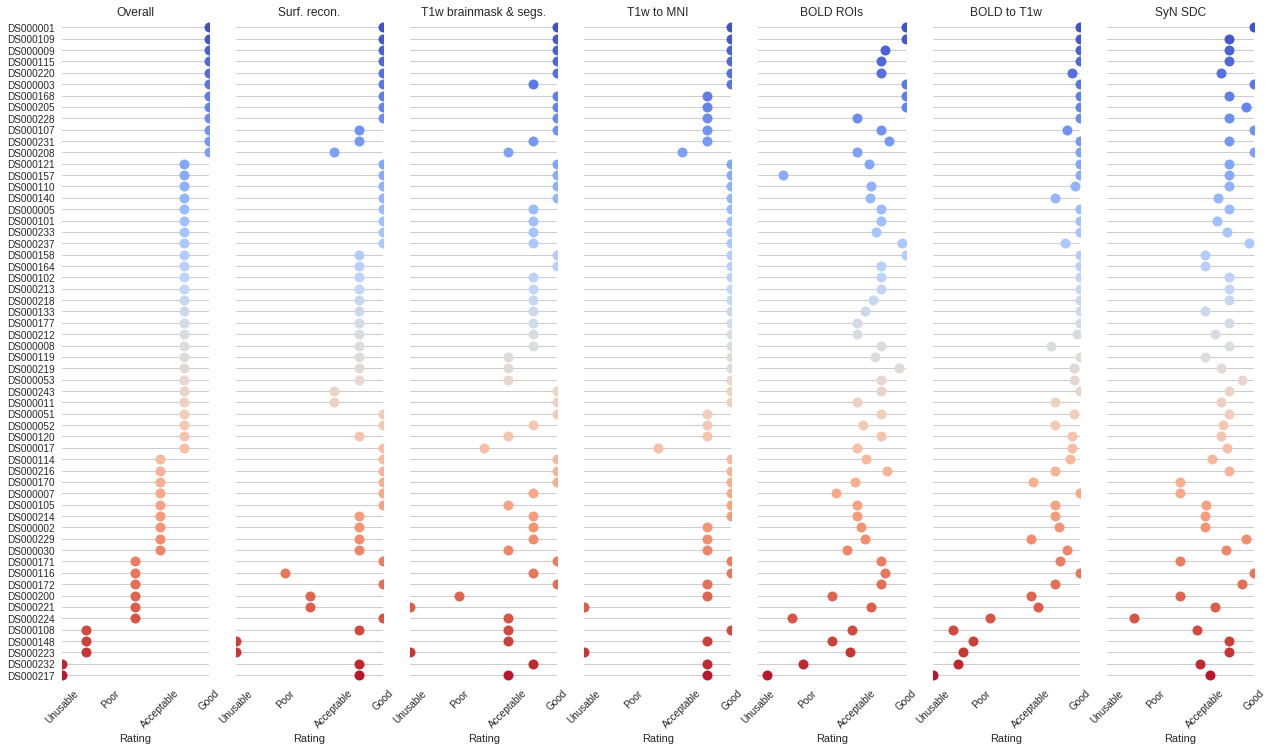

In [21]:
import seaborn as sns
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(dataframe.sort_values(["overall", "t1_t1_2_mni", "t1_reconall", "t1_seg_brainmask", "bold_bbr", "bold_rois"], ascending=False),
                 x_vars=['overall', 't1_reconall', 't1_seg_brainmask', 't1_t1_2_mni',
                         'bold_rois', 'bold_bbr', 'bold_syn_sdc'], y_vars=["dataset"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="coolwarm", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 3), xlabel="Rating", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Overall", "Surf. recon.", "T1w brainmask & segs.", 
          "T1w to MNI", "BOLD ROIs", "BOLD to T1w", "SyN SDC"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set(xticklabels=['Unusable', 'Poor', 'Acceptable', 'Good'])
    for x in ax.get_xticklabels():
        x.set_rotation(45)
    

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig('figure04.pdf', format='pdf', bbox_inches='tight', pad_inches=0, dpi=300)